# Identifying Duplicate Questions: Data Analysis

Over 100 million people visit Quora every month, and many people ask similar (or the same) questions. Various questions with the same intent can cause people to spend extra time searching for the best answer to their question, and results in members answering multiple versions of the same question. 

The goal is to identify whether two questions are duplicates or not (binary classification problem).

## 1. Download data 

Quora dataset contains pairs of questions and labels for each pair (column 'is_duplicate').

In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

In [2]:
quora = pd.read_csv('../data/quora_train.csv')
quora.head()

,id,qid1,qid2,question1,question2,is_duplicate
0,0,1,2,What is the step by step guide to invest in sh...,What is the step by step guide to invest in sh...,0
1,1,3,4,What is the story of Kohinoor (Koh-i-Noor) Dia...,What would happen if the Indian government sto...,0
2,2,5,6,How can I increase the speed of my internet co...,How can Internet speed be increased by hacking...,0
3,3,7,8,Why am I mentally very lonely? How can I solve...,Find the remainder when [math]23^{24}[/math] i...,0
4,4,9,10,"Which one dissolve in water quikly sugar, salt...",Which fish would survive in salt water?,0


Information about the dataset:

In [3]:
quora.info()

# Total 404290 data points
# There are 1 missing value in 'question1' and 2 missing values in 'question2'

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 404290 entries, 0 to 404289
Data columns (total 6 columns):
 #   Column        Non-Null Count   Dtype 
---  ------        --------------   ----- 
 0   id            404290 non-null  int64 
 1   qid1          404290 non-null  int64 
 2   qid2          404290 non-null  int64 
 3   question1     404289 non-null  object
 4   question2     404288 non-null  object
 5   is_duplicate  404290 non-null  int64 
dtypes: int64(4), object(2)
memory usage: 18.5+ MB


In [4]:
# Rows with missing values

quora[quora['question1'].isnull() | quora['question2'].isnull()]

,id,qid1,qid2,question1,question2,is_duplicate
105780,105780,174363,174364,How can I develop android app?,NaN,0
201841,201841,303951,174364,How can I create an Android app?,NaN,0
363362,363362,493340,493341,NaN,My Chinese name is Haichao Yu. What English na...,0


In [5]:
# Drop 3 rows that have nulls, then reset index

quora2 = quora.dropna()
quora2.reset_index(inplace=True, drop=True)

quora2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 404287 entries, 0 to 404286
Data columns (total 6 columns):
 #   Column        Non-Null Count   Dtype 
---  ------        --------------   ----- 
 0   id            404287 non-null  int64 
 1   qid1          404287 non-null  int64 
 2   qid2          404287 non-null  int64 
 3   question1     404287 non-null  object
 4   question2     404287 non-null  object
 5   is_duplicate  404287 non-null  int64 
dtypes: int64(4), object(2)
memory usage: 18.5+ MB


### Target - 'is_duplicate'

In [6]:
# Check the proportion of each class in the target variable

quora2['is_duplicate'].value_counts(normalize=True)

# 63% - non-duplicates, 37% - duplicates

0    0.630799
1    0.369201
Name: is_duplicate, dtype: float64

## 2. Split the data into the training, validation and test sets

Keep the proportions of labels during each split.

In [7]:
from sklearn.model_selection import train_test_split

train_val_set, test_set = train_test_split(quora2, test_size=0.2, stratify=quora2['is_duplicate'], random_state=42)

In [8]:
print(train_val_set.shape)
print(test_set.shape)

(323429, 6)
(80858, 6)


In [9]:
train_val_set['is_duplicate'].value_counts(normalize=True)

0    0.6308
1    0.3692
Name: is_duplicate, dtype: float64

In [10]:
test_set['is_duplicate'].value_counts(normalize=True)

0    0.630797
1    0.369203
Name: is_duplicate, dtype: float64

In [11]:
# Split train_val_set into training set and validation set

train_set, val_set = train_test_split(train_val_set, test_size=0.3, stratify=train_val_set['is_duplicate'], random_state=42)

In [12]:
print(train_set.shape)
print(val_set.shape)

(226400, 6)
(97029, 6)


Save 3 sets as csv files:

In [54]:
train_set.to_csv('../data/train_set.csv', index=False)

In [55]:
val_set.to_csv('../data/val_set.csv', index=False)

In [56]:
test_set.to_csv('../data/test_set.csv', index=False)

## 3. Data Exploration

In [13]:
train_set.head()

,id,qid1,qid2,question1,question2,is_duplicate
319166,319168,444572,444573,How do I determine the resale value of my iPad?,How do I determine the resale value for my home?,0
289592,289594,410730,410731,What are the best methamatics books for GATE E...,What is the best book for GATE for the ECE Bra...,0
64114,64114,111466,111467,If the total cost of three books and four pens...,The total cost of three books and four pens is...,1
322214,322216,220283,448008,What's the best tablet for an Avid PDF reader?,How many pages per day do avid readers read?,0
315199,315201,140252,394561,Where can I get best assistance in Sydney to g...,Where can I get best assistance for commercial...,1


In [14]:
train_set.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 226400 entries, 319166 to 323364
Data columns (total 6 columns):
 #   Column        Non-Null Count   Dtype 
---  ------        --------------   ----- 
 0   id            226400 non-null  int64 
 1   qid1          226400 non-null  int64 
 2   qid2          226400 non-null  int64 
 3   question1     226400 non-null  object
 4   question2     226400 non-null  object
 5   is_duplicate  226400 non-null  int64 
dtypes: int64(4), object(2)
memory usage: 12.1+ MB


### Number of characters in questions

In [16]:
# Create new columns with string length for question 1 and question 2

train_set['num_chars_q1'] = train_set['question1'].str.len()
train_set['num_chars_q2'] = train_set['question2'].str.len()
train_set.head()

,id,qid1,qid2,question1,question2,is_duplicate,num_chars_q1,num_chars_q2
319166,319168,444572,444573,How do I determine the resale value of my iPad?,How do I determine the resale value for my home?,0,47,48
289592,289594,410730,410731,What are the best methamatics books for GATE E...,What is the best book for GATE for the ECE Bra...,0,56,50
64114,64114,111466,111467,If the total cost of three books and four pens...,The total cost of three books and four pens is...,1,139,130
322214,322216,220283,448008,What's the best tablet for an Avid PDF reader?,How many pages per day do avid readers read?,0,46,44
315199,315201,140252,394561,Where can I get best assistance in Sydney to g...,Where can I get best assistance for commercial...,1,86,80


#### Check value counts and plot histograms for new columns.

Question 1:

In [19]:
train_set['num_chars_q1'].value_counts()

42     4803
44     4759
43     4700
45     4688
38     4584
       ... 
289       1
623       1
294       1
282       1
281       1
Name: num_chars_q1, Length: 311, dtype: int64

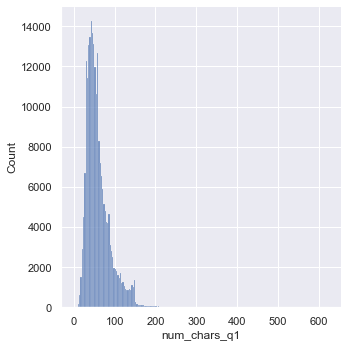

In [20]:
sns.displot(train_set['num_chars_q1'], bins=200);

Question 2:

In [21]:
train_set['num_chars_q2'].value_counts()

44     5309
43     5167
42     4980
40     4867
46     4810
       ... 
506       1
8         1
407       1
269       1
519       1
Name: num_chars_q2, Length: 354, dtype: int64

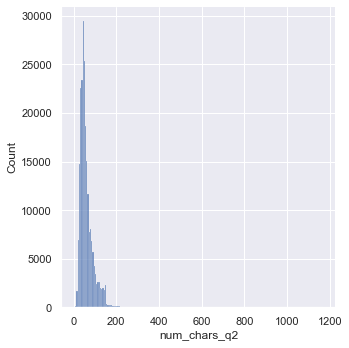

In [22]:
sns.displot(train_set['num_chars_q2'], bins=200);

Most questions in both columns have less than 200 characters.

#### For all questions: unique values of string length

In [24]:
num_chars_unique = set(train_set['num_chars_q1'].unique()) | set(train_set['num_chars_q2'].unique())

print('Min number of characters:', min(num_chars_unique))
print('Max number of characters:', max(num_chars_unique))
print('Average number of characters:', round(np.mean(list(num_chars_unique))))

Min number of characters: 1
Max number of characters: 1169
Average number of characters: 195


In [25]:
# Examples of question 1 with <= 5 characters

train_set[train_set['num_chars_q1'].isin([1, 2, 3, 4, 5])].head(10)

,id,qid1,qid2,question1,question2,is_duplicate,num_chars_q1,num_chars_q2
216859,216861,323090,17986,Aaas,My dad always yells at me and causes me anxiet...,0,4,67
86457,86457,145814,81121,Is?,Does mother/son incest happen in India?,0,3,39
208483,208485,312495,312496,?,"Given that PACER makes money from usage, why d...",0,1,101
273063,273065,391451,380455,?,"How can I describe Quora, in all its glory, to...",0,1,55
54029,54029,95429,95430,I'm,I am a 39 year old single woman. Should I have...,0,4,60
328599,328601,451788,455166,My,My father has many new technologies with him (...,0,2,122
402420,402423,535899,119568,?,What is cisco router technical support phone n...,0,1,52
175583,175584,95429,110024,I'm,I am 25 yrs old and I am still virgin. How can...,0,4,66
72844,72844,125092,125093,lol ?,What is League of Legends?,0,5,26
63712,63712,83329,110823,What?,What is the average processing time for a spou...,0,5,84


### Number of words in questions

In [26]:
# Function to calculate the number of words in a string
# Using gensim library to convert a document into a list of lowercased words,
# punctuation is being removed during preprocessing


import gensim

def count_words(doc):
    words = gensim.utils.simple_preprocess(doc, min_len=1, max_len=20)
    return len(words)

C:\Users\ZLATA\anaconda3\envs\bootcamp_env\lib\site-packages\gensim\similarities\__init__.py:15: UserWarning: The gensim.similarities.levenshtein submodule is disabled, because the optional Levenshtein package <https://pypi.org/project/python-Levenshtein/> is unavailable. Install Levenhstein (e.g. `pip install python-Levenshtein`) to suppress this warning.
  warnings.warn(msg)


In [27]:
# Add new columns with number of words for question 1 and question 2

train_set['num_words_q1'] = train_set['question1'].map(lambda x: count_words(x))
train_set['num_words_q2'] = train_set['question2'].map(lambda x: count_words(x))
train_set.head()

,id,qid1,qid2,question1,question2,is_duplicate,num_chars_q1,num_chars_q2,num_words_q1,num_words_q2
319166,319168,444572,444573,How do I determine the resale value of my iPad?,How do I determine the resale value for my home?,0,47,48,10,10
289592,289594,410730,410731,What are the best methamatics books for GATE E...,What is the best book for GATE for the ECE Bra...,0,56,50,10,11
64114,64114,111466,111467,If the total cost of three books and four pens...,The total cost of three books and four pens is...,1,139,130,32,30
322214,322216,220283,448008,What's the best tablet for an Avid PDF reader?,How many pages per day do avid readers read?,0,46,44,10,9
315199,315201,140252,394561,Where can I get best assistance in Sydney to g...,Where can I get best assistance for commercial...,1,86,80,15,14


#### For all questions: find unique values of number of words in a question

In [28]:
num_words_unique = set(train_set['num_words_q1'].unique()) | set(train_set['num_words_q2'].unique())

print('Min number of words:', min(num_words_unique))
print('Max number of words:', max(num_words_unique))
print('Average number of words:', round(np.mean(list(num_words_unique))))

Min number of words: 0
Max number of words: 245
Average number of words: 51


### Column 'qid1' - id for Question 1

In [29]:
# Number of unique questions (question 1)

len(train_set['qid1'].unique())

179038

How often the same question id occurs in this column:

In [30]:
train_set['qid1'].value_counts()[:100]

25984    30
1749     30
14110    30
8461     28
20628    28
         ..
2929     16
7016     16
8154     16
35003    15
25851    15
Name: qid1, Length: 100, dtype: int64

In [31]:
train_set['qid1'].value_counts()[-100:]

59829     1
186086    1
175816    1
530037    1
361696    1
         ..
464473    1
356994    1
122411    1
229279    1
6085      1
Name: qid1, Length: 100, dtype: int64

In [32]:
# Number of questions that occur once in this column

(train_set['qid1'].value_counts() == 1).sum()

153280

In [33]:
# Number of questions that occur < 10 times in this column (almost all questions)

(train_set['qid1'].value_counts() < 10).sum()

178580

<AxesSubplot:>

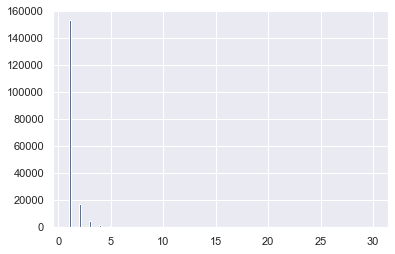

In [34]:
train_set['qid1'].value_counts().hist(bins=150)

# majority of questions occurs once or a few times as a question 1

### Column 'qid2' - id for Question 2

In [36]:
# Number of unique questions (question 2)

len(train_set['qid2'].unique())

181817

How often the same question id occurs in this column:

In [37]:
train_set['qid2'].value_counts()

2559      67
30782     67
4044      47
2561      36
28764     34
          ..
49476      1
501821     1
528263     1
133545     1
449315     1
Name: qid2, Length: 181817, dtype: int64

In [38]:
(train_set['qid2'].value_counts() == 1).sum()

159709

In [39]:
(train_set['qid2'].value_counts() < 10).sum()

181262

<AxesSubplot:>

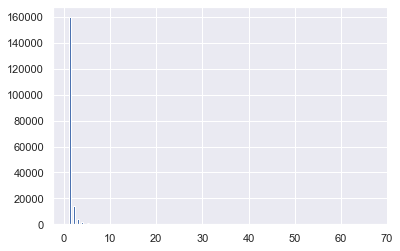

In [40]:
train_set['qid2'].value_counts().hist(bins=150)

# majority of questions occurs once or a few times as a question 2

### All questions

In [41]:
# Concatenate question ids from 'qid1' and 'quid2'

questions = pd.concat([train_set['qid1'], train_set['qid2']], ignore_index=True)
questions

0         444572
1         410730
2         111466
3         220283
4         140252
           ...  
452795    511872
452796    533238
452797     68211
452798      6086
452799    449315
Length: 452800, dtype: int64

In [42]:
# Total number of unique questions in 'qid1' and 'quid2'

len(questions.unique())

335954

In [43]:
# Number of questions that appear in both columns

intersection_q1_q2 = set(train_set['qid1'].unique()) & set(train_set['qid2'].unique())
len(intersection_q1_q2)

24901

In [44]:
questions.value_counts()

2559      91
30782     67
4044      56
14376     45
2561      45
          ..
69858      1
401556     1
336693     1
277610     1
449315     1
Length: 335954, dtype: int64

### Examples of questions that occur more often in the dataset:

Question #1 (91 occurrences)

In [45]:
quora2[(quora2['qid1'] == 2559) | (quora2['qid2'] == 2559)].head()

# "What are the best ways to lose weight?"

,id,qid1,qid2,question1,question2,is_duplicate
1283,1283,2558,2559,Why do I not lose weight when I throw up?,What are the best ways to lose weight?,0
2290,2290,4554,2559,Is it possible to reduce 17 lbs in one month?,What are the best ways to lose weight?,0
8765,8765,9036,2559,What is the quickest possible way to lose weight?,What are the best ways to lose weight?,0
9001,9001,17518,2559,How can I gain weight within 2 month?,What are the best ways to lose weight?,0
12247,12247,23609,2559,Can I loose my weight around 10kg in 25 days?,What are the best ways to lose weight?,0


Question #2 (67 occurrences)

In [46]:
quora2[(quora2['qid1'] == 30782) | (quora2['qid2'] == 30782)].head()

,id,qid1,qid2,question1,question2,is_duplicate
16138,16138,30781,30782,If I link my Instagram account to my Facebook ...,How can you look at someone's private Instagra...,0
16183,16183,30866,30782,Can you view pictures on Instagram without an ...,How can you look at someone's private Instagra...,0
17232,17232,32775,30782,How many Oriya girls wear mini skirts?,How can you look at someone's private Instagra...,0
20239,20239,38203,30782,Why did Symbian fail?,How can you look at someone's private Instagra...,0
22376,22376,41999,30782,How do I see followers on someone's private In...,How can you look at someone's private Instagra...,0


In [47]:
quora2[(quora2['qid1'] == 30782) | (quora2['qid2'] == 30782)].iloc[0, -2]

"How can you look at someone's private Instagram account without following them?"

Question #3 (56 occurrences)

In [48]:
quora2[(quora2['qid1'] == 4044) | (quora2['qid2'] == 4044)].head()

# "How can I lose weight quickly?"

,id,qid1,qid2,question1,question2,is_duplicate
2032,2032,4043,4044,What are some ways to lose 25 pounds in one mo...,How can I lose weight quickly?,0
5567,5567,10946,4044,How could I gain weight quickly?,How can I lose weight quickly?,0
6665,6665,13049,4044,How do I lose body fat quickly?,How can I lose weight quickly?,1
11236,11236,21716,4044,How can I lose 15 kilos in one month?,How can I lose weight quickly?,0
11993,11993,4044,20607,How can I lose weight quickly?,How can someone lose weight quickly?,1


Question #4 (45 occurrences)

In [49]:
quora2[(quora2['qid1'] == 14376) | (quora2['qid2'] == 14376)].head()

# "Can you see who views your Instagram?"

,id,qid1,qid2,question1,question2,is_duplicate
7357,7357,14375,14376,How do I make money using Instagram?,Can you see who views your Instagram?,0
18838,18838,35653,14376,Does it appear in your news feed when you chan...,Can you see who views your Instagram?,0
22967,22967,43066,14376,Porn addiction: Can it confuse your sexuality?,Can you see who views your Instagram?,0
32835,32835,14376,47683,Can you see who views your Instagram?,Can you see who views your Instagram stories?,1
37009,37009,67406,14376,New Yorkers - Do you like the English?,Can you see who views your Instagram?,0


Question #5 (45 occurrences)

In [50]:
quora2[(quora2['qid1'] == 2561) | (quora2['qid2'] == 2561)].head()

# "What's the easiest way to make money online?"

,id,qid1,qid2,question1,question2,is_duplicate
1284,1284,2560,2561,How can I make money online in India?,What's the easiest way to make money online?,0
4180,4180,8268,2561,How can I make money online for free?,What's the easiest way to make money online?,0
10659,10659,20628,2561,What should I do to earn money online?,What's the easiest way to make money online?,1
19667,19667,6438,2561,How can I make money online for job?,What's the easiest way to make money online?,1
21776,21776,40959,2561,What are some ways to make money from home?,What's the easiest way to make money online?,0


#### The notebook quora_model.ipynb includes the next steps - data preprocessing and modeling.